# House Price Prediction Model

Before running this notebook, be sure run [Data Wrangling](data_wrangling.ipynb) jupyter notebook to obtain the dataset for training the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set()
%matplotlib inline

In [2]:
# load data
df_data = pd.read_pickle('data/house_price_w_temp.pkl')
df_data.head()

Division Region    State State Code          City  Year  Month  \
0             Pacific   West   Alaska         AK     Anchorage  1996      1   
1  East South Central  South  Alabama         AL        Auburn  1996      1   
2  East South Central  South  Alabama         AL  Autaugaville  1996      1   
3  East South Central  South  Alabama         AL   Bay Minette  1996      1   
4  East South Central  South  Alabama         AL         Berry  1996      1   

   StateAvgYearlyTemp  CityAvgYearlyTemp  AvgHousePrice  ...  \
0           35.700792          37.416278       124475.0  ...   
1           63.960195          63.960195       129520.0  ...   
2           63.960195          63.960195        79769.0  ...   
3           63.960195          63.960195        59125.0  ...   
4           63.960195          63.960195        65718.0  ...   

   State__South Dakota  State__Tennessee  State__Texas  State__Utah  \
0                    0                 0             0            0   
1                    0                 0             0            0   
2                    0                 0             0            0   
3                    0                 0             0            0   
4                    0                 0             0            0   

   State__Vermont  State__Virginia  State__Washington  State__West Virginia  \
0               0                0                  0                     0   
1               0                0                  0                     0   
2               0                0                  0                     0   
3               0                0                  0                     0   
4               0                0                  0                     0   

   State__Wisconsin  State__Wyoming  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  

[5 rows x 74 columns]

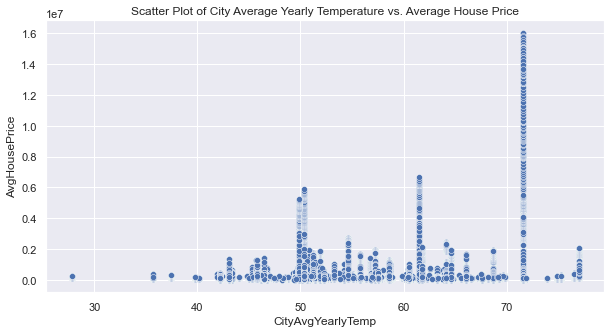

In [3]:
# scatter plot of CityAvgYearlyTemp and AvgHousePrice
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_data[['CityAvgYearlyTemp', 'AvgHousePrice']], x="CityAvgYearlyTemp", y="AvgHousePrice")
plt.title('Scatter Plot of City Average Yearly Temperature vs. Average House Price')
plt.show()

## Base Model

In [6]:
param = {'rf__n_estimators': [5]}
base_model = HousePriceModel('base_model', param, list(X_train.columns))
base_model.evaluate(X_train, y_train, X_test, y_test)
base_model.metrics

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.9min finished


model_name           mse          rmse           mae  R-squared  \
0  base_model  2.905918e+10  170467.54747  75903.210443   0.223125   

   training_time  
0     362.071398

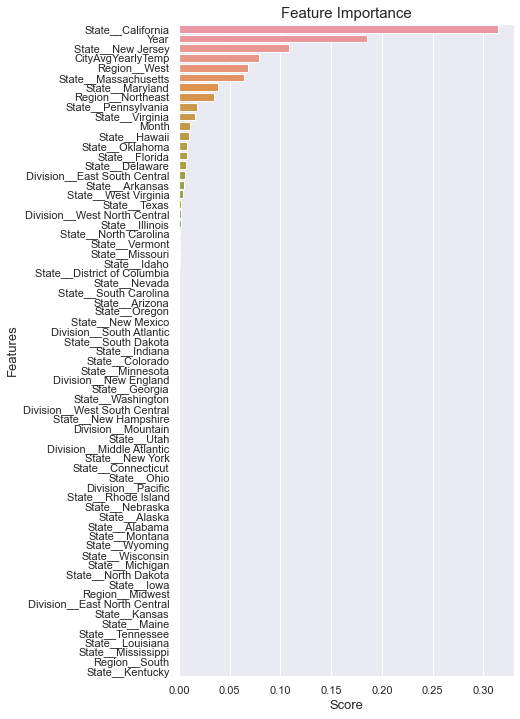

In [7]:
base_model.plot_feature_importance((6,12))

## Model with Less Features

In [8]:
# exclude states from the model
features = X_train.columns[:16]
model1 = HousePriceModel('model 1', param, list(features))
model1.evaluate(X_train[features], y_train, X_test[features], y_test)
model1.metrics

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.2s finished


model_name           mse           rmse           mae  R-squared  \
0    model 1  2.905920e+10  170467.589001  75897.703197   0.223127   

   training_time  
0     107.054318

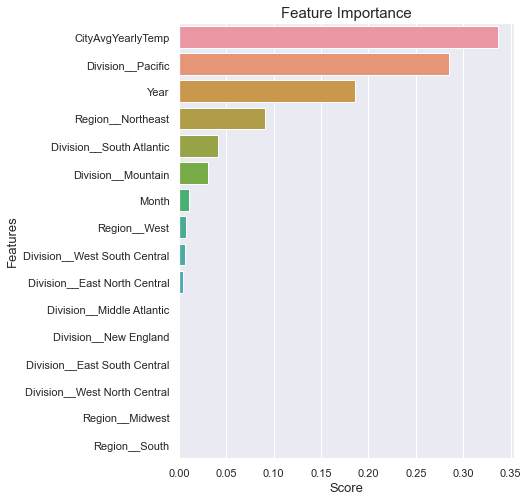

In [9]:
model1.plot_feature_importance((6,8))

Since model1 uses less features, has shorter training time and the error scores are almost the same as the base model's error scores, we use model1 to make house price prediction.

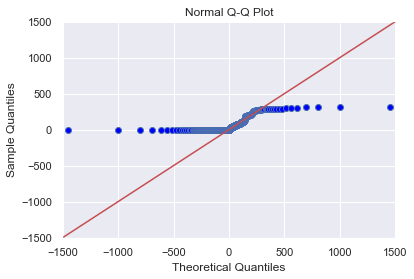

In [10]:
# check if data is normally distributed
import scipy.stats as stats
fig = sm.qqplot(model1.residuals['Residuals'], stats.t, fit=True, line="45")
plt.title('Normal Q-Q Plot')
plt.show()

In [11]:
import pickle

# load df_states for information lookup
df_states = pickle.load(open('web_app/df_states.sav', 'rb'))
df_states.head()

State State Code Region            Division        City  \
0   Alaska         AK   West             Pacific   Anchorage   
1   Alaska         AK   West             Pacific   Fairbanks   
2   Alaska         AK   West             Pacific      Juneau   
3  Alabama         AL  South  East South Central  Birmingham   
4  Alabama         AL  South  East South Central  Huntsville   

   CityAvgYearlyTemp  
0          37.416278  
1          27.802421  
2          41.883678  
3          63.142865  
4          61.292728

In [12]:
# now look for the states having temperature in the specified range
min_temp = 60
max_temp = 75

# get all states having the avg yearly temperature in range
temp = df_states[(df_states.CityAvgYearlyTemp >= min_temp) & (df_states.CityAvgYearlyTemp <= max_temp)]
temp

State State Code Region            Division  \
3           Alabama         AL  South  East South Central   
4           Alabama         AL  South  East South Central   
5           Alabama         AL  South  East South Central   
6           Alabama         AL  South  East South Central   
7          Arkansas         AR  South  West South Central   
8          Arkansas         AR  South  West South Central   
10          Arizona         AZ   West            Mountain   
11          Arizona         AZ   West            Mountain   
12          Arizona         AZ   West            Mountain   
13       California         CA   West             Pacific   
14       California         CA   West             Pacific   
15       California         CA   West             Pacific   
16       California         CA   West             Pacific   
26          Florida         FL  South      South Atlantic   
27          Florida         FL  South      South Atlantic   
29          Florida         FL  South      South Atlantic   
30          Florida         FL  South      South Atlantic   
31          Florida         FL  South      South Atlantic   
33          Georgia         GA  South      South Atlantic   
34          Georgia         GA  South      South Atlantic   
35          Georgia         GA  South      South Atlantic   
36          Georgia         GA  South      South Atlantic   
56        Louisiana         LA  South  West South Central   
57        Louisiana         LA  South  West South Central   
58        Louisiana         LA  South  West South Central   
59        Louisiana         LA  South  West South Central   
75      Mississippi         MS  South  East South Central   
76      Mississippi         MS  South  East South Central   
81   North Carolina         NC  South      South Atlantic   
83   North Carolina         NC  South      South Atlantic   
93           Nevada         NV   West            Mountain   
107        Oklahoma         OK  South  West South Central   
108        Oklahoma         OK  South  West South Central   
120  South Carolina         SC  South      South Atlantic   
121  South Carolina         SC  South      South Atlantic   
124       Tennessee         TN  South  East South Central   
126       Tennessee         TN  South  East South Central   
128           Texas         TX  South  West South Central   
130           Texas         TX  South  West South Central   
131           Texas         TX  South  West South Central   
132           Texas         TX  South  West South Central   
133           Texas         TX  South  West South Central   
134           Texas         TX  South  West South Central   
135           Texas         TX  South  West South Central   
136           Texas         TX  South  West South Central   
137           Texas         TX  South  West South Central   
138           Texas         TX  South  West South Central   
139           Texas         TX  South  West South Central   
140           Texas         TX  South  West South Central   
141           Texas         TX  South  West South Central   
143        Virginia         VA  South      South Atlantic   

                     City  CityAvgYearlyTemp  
3              Birmingham          63.142865  
4              Huntsville          61.292728  
5                  Mobile          66.595995  
6              Montgomery          64.809193  
7              Fort Smith          61.345895  
8             Little Rock          62.247331  
10                Phoenix          74.887184  
11                 Tucson          69.786108  
12                   Yuma          64.030149  
13                 Fresno          64.550491  
14            Los Angeles          62.537100  
15             Sacramento          60.193703  
16              San Diego          63.411628  
26          Daytona Beach          69.212314  
27           Jacksonville          67.390708  
29                Orlando          71.552996  
30            Tallahassee          67.2254

In [13]:
# perform one-hot-encodings
temp = pd.concat([temp, pd.get_dummies(temp['Region'], prefix='Region_')], axis=1)
temp = pd.concat([temp, pd.get_dummies(temp['Division'], prefix='Division_')], axis=1)
temp.head()

State State Code Region            Division        City  \
3   Alabama         AL  South  East South Central  Birmingham   
4   Alabama         AL  South  East South Central  Huntsville   
5   Alabama         AL  South  East South Central      Mobile   
6   Alabama         AL  South  East South Central  Montgomery   
7  Arkansas         AR  South  West South Central  Fort Smith   

   CityAvgYearlyTemp  Region__South  Region__West  \
3          63.142865              1             0   
4          61.292728              1             0   
5          66.595995              1             0   
6          64.809193              1             0   
7          61.345895              1             0   

   Division__East South Central  Division__Mountain  Division__Pacific  \
3                             1                   0                  0   
4                             1                   0                  0   
5                             1                   0                  0   
6                             1                   0                  0   
7                             0                   0                  0   

   Division__South Atlantic  Division__West South Central  
3                         0                             0  
4                         0                             0  
5                         0                             0  
6                         0                             0  
7                         0                             1

In [14]:
temp.shape

(51, 13)

In [15]:
# build inputs data frame for house price estimate
inputs = pd.DataFrame(columns=features)

for feature in features:
    if feature in list(temp.columns[4:]):
        inputs[feature] = temp[feature]

# fill in month and year
inputs['Month'] = 3
inputs['Year'] = 2021

# fill missing values with 0
inputs.fillna(0, inplace=True)
inputs.head()

Year  Month  CityAvgYearlyTemp  Region__Midwest  Region__Northeast  \
3  2021      3          63.142865                0                  0   
4  2021      3          61.292728                0                  0   
5  2021      3          66.595995                0                  0   
6  2021      3          64.809193                0                  0   
7  2021      3          61.345895                0                  0   

   Region__South  Region__West  Division__East North Central  \
3              1             0                             0   
4              1             0                             0   
5              1             0                             0   
6              1             0                             0   
7              1             0                             0   

   Division__East South Central  Division__Middle Atlantic  \
3                             1                          0   
4                             1                          0   
5                             1                          0   
6                             1                          0   
7                             0                          0   

   Division__Mountain  Division__New England  Division__Pacific  \
3                   0                      0                  0   
4                   0                      0                  0   
5                   0                      0                  0   
6                   0                      0                  0   
7                   0                      0                  0   

   Division__South Atlantic  Division__West North Central  \
3                         0                             0   
4                         0                             0   
5                         0                             0   
6                         0                             0   
7                         0                             0   

   Division__West South Central  
3                             0  
4                             0  
5                             0  
6                             0  
7                             1

In [16]:
inputs.shape

(51, 16)

In [17]:
# build outputs table
outputs = pd.DataFrame(columns=['State', 'City', 'CityAvgYearlyTemp', 'PredictedPrice'])
outputs['State'] = temp['State']
outputs['City'] = temp['City']
outputs['CityAvgYearlyTemp'] = inputs['CityAvgYearlyTemp']
outputs['PredictedPrice'] = np.round(model1.model.predict(inputs), 2)
outputs

State                  City  CityAvgYearlyTemp  PredictedPrice
3           Alabama            Birmingham          63.142865        64526.40
4           Alabama            Huntsville          61.292728       145867.88
5           Alabama                Mobile          66.595995       127752.20
6           Alabama            Montgomery          64.809193        91353.60
7          Arkansas            Fort Smith          61.345895       107858.72
8          Arkansas           Little Rock          62.247331       151485.20
10          Arizona               Phoenix          74.887184       272436.55
11          Arizona                Tucson          69.786108       229476.44
12          Arizona                  Yuma          64.030149       225010.47
13       California                Fresno          64.550491       408846.60
14       California           Los Angeles          62.537100       686209.80
15       California            Sacramento          60.193703       449312.06
16       California             San Diego          63.411628       642445.80
26          Florida         Daytona Beach          69.212314       161671.20
27          Florida          Jacksonville          67.390708       192386.80
29          Florida               Orlando          71.552996       258203.20
30          Florida           Tallahassee          67.225484       195651.60
31          Florida  Tampa St. Petersburg          72.659516       308276.38
33          Georgia               Atlanta          62.433505       293059.20
34          Georgia              Columbus          64.650454       114367.64
35          Georgia                 Macon          63.755219        92513.60
36          Georgia              Savannah          65.740623       167004.60
56        Louisiana           Baton Rouge          66.391156       182716.81
57        Louisiana          Lake Charles          68.194502       179647.20
58        Louisiana           New Orleans          69.371038       237289.00
59        Louisiana            Shreveport          65.845048       105193.20
75      Mississippi               Jackson          64.429443        42661.60
76      Mississippi                Tupelo          61.978237       145867.88
81   North Carolina             Charlotte          60.813688       249879.80
83   North Carolina        Raleigh Durham          60.119976       196545.60
93           Nevada             Las Vegas          69.604650       243923.64
107        Oklahoma         Oklahoma City          60.116942       140863.00
108        Oklahoma                 Tulsa          60.780480       109987.53
120  South Carolina            Charleston          65.335898       334706.80
121  South Carolina              Columbia          63.887618       152088.77
124       Tennessee           Chattanooga          60.592987       160533.41
126       Tennessee               Memphis          62.763369        90863.40
128           Texas               Abilene          64.065243       136904.00
130           Texas                Austin          67.470179       401346.60
131           Texas           Brownsville          73.886762       101652.80
132           Texas        Corpus Christi          71.905190       159202.60
133           Texas       Dallas Ft Worth          66.422947       182716.81
134           Texas               El Paso          65.838613       136794.00
135           Texas               Houston          69.032959       187183.80
136           Texas               Lubbock          60.316970       150118.00
137           Texas        Midland Odessa          64.220855       136904.00
138           Texas            San Angelo          65.588100       137046.60
139           Texas           San Antonio          69.120778       185255.20
140           Texas                  Waco          66.490172       154128.21
141           Texas         Wichita Falls          63.378153       101883.40
143        Virginia               Norfolk          60.402519       196545.60

In [18]:
# show only location the meet the price's range
min_price = 130000
max_price = 180000

outputs[(outputs.PredictedPrice >= min_price) & (outputs.PredictedPrice <= max_price)]

State            City  CityAvgYearlyTemp  PredictedPrice
4           Alabama      Huntsville          61.292728       145867.88
8          Arkansas     Little Rock          62.247331       151485.20
26          Florida   Daytona Beach          69.212314       161671.20
36          Georgia        Savannah          65.740623       167004.60
57        Louisiana    Lake Charles          68.194502       179647.20
76      Mississippi          Tupelo          61.978237       145867.88
107        Oklahoma   Oklahoma City          60.116942       140863.00
121  South Carolina        Columbia          63.887618       152088.77
124       Tennessee     Chattanooga          60.592987       160533.41
128           Texas         Abilene          64.065243       136904.00
132           Texas  Corpus Christi          71.905190       159202.60
134           Texas         El Paso          65.838613       136794.00
136           Texas         Lubbock          60.316970       150118.00
137           Texas  Midland Odessa          64.220855       136904.00
138           Texas      San Angelo          65.588100       137046.60
140           Texas            Waco          66.490172       154128.21

## Save Model

In [19]:
pickle.dump(model1, open('web_app/model.sav', 'wb'))               # save model
pickle.dump(features, open('web_app/features.sav', 'wb'))          # save features

# export residuals data frame to csv
residuals['Residuals'] = model1.residuals['Residuals']
residuals.to_csv('web_app/residuals.csv', index=False)      